In [9]:
# Imports 
import numpy as np
import random
import tracemalloc as tm # To track the memory usage
from datetime import datetime

# Parameters
n_cities = 20

#n_population = 100

#mutation_rate = 0.3

# Generating a list of coordenades representing each city
coordinates_list = [[x,y] for x,y in zip(np.random.randint(0,100,n_cities),np.random.randint(0,100,n_cities))]
names_list = np.array(['Berlin', 'London', 'Moscow', 'Barcelona', 'Rome', 'Paris', 'Vienna', 'Munich', 'Istanbul', 'Kyiv', 'Bucharest', 'Minsk', 'Warsaw', 'Budapest', 'Milan', 'Prague', 'Sofia', 'Birmingham', 'Brussels', 'Amsterdam'])
cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}

# Function to compute the distance between two points
def compute_city_distance_coordinates(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])
    
# First step: Create the first population set
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total

def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list

def progenitor_selection(population_set,fitnes_list):
    total_fit = fitnes_list.sum()
    prob_list = (total_fit/fitnes_list)
    prob_list = prob_list/prob_list.sum()
    
    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    
    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]
    
    
    return np.array([progenitor_list_a,progenitor_list_b])

def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[0:5]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring
            
    
    
def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)
        
    return new_population_set

def mutate_offspring(offspring,mutation_rate):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring
    
    
def mutate_population(new_population_set,mutation_rate):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring,mutation_rate))
    return mutated_pop


In [10]:
# Function to run the Genetic Algorithm, varying the population size and keeping the mutation rate unchanged
# Returns the population size, The iteration which achieved the best fitness value and the best fitness value (minimum distance in the whole path)

def get_best_solution():
    init_pop=genesis(names_list,n_population) # 1. generate initial set of the the paths that the salesman travels
    fitnes_list=get_all_fitnes(init_pop, cities_dict) # 2.get fitness values of all the paths in the initial path list (generated in 1)
    parentList=progenitor_selection(init_pop,fitnes_list) # 3. Select parents from the initial population to cross over
    new_pop_list=mate_population(parentList) # 4. Generate the next population (new set of paths that the salesman travels)
    mutated_pop=mutate_population(new_pop_list,mutation_rate) # 5. Mutate the new population set (generated in 4) and create the next population list
        
    best_solution = [-1,np.inf,np.array([])]
    for i in range(10000):
        if i%50==0: print(i, best_solution[1], fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))
        fitnes_list = get_all_fitnes(mutated_pop,cities_dict)
        
        #Saving the best solution
        if fitnes_list.min() < best_solution[1]:
            best_solution[0] = i
            best_solution[1] = fitnes_list.min()
            best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]
        
        progenitor_list = progenitor_selection(init_pop,fitnes_list)
        new_population_set = mate_population(progenitor_list)
        
        mutated_pop = mutate_population(new_population_set,mutation_rate)
    return best_solution[0],best_solution[1]

In [11]:
# Arrays to collect data to generate performance comparison grapghs for population sizes
populationSize=[]
bestFits=[]
iterations=[]

In [31]:
# Run the GA for poplation size=100 and mutation rate =0.1
n_population=100
mutation_rate=0.1
b,c=get_best_solution()
print(f"Population:100,MutationRate:{mutation_rate},Iteration:{b},Best Fitness Value:{c}")
populationSize.append(n_population)
iterations.append(b)
bestFits.append(c)

0 inf 1005.2796821008704 02/10/24 16:20
50 633.6103293112512 1000.2336539463058 02/10/24 16:20
100 633.6103293112512 985.7172496037387 02/10/24 16:20
150 599.3641570498124 1020.3450658194055 02/10/24 16:21
200 599.3641570498124 1009.2476379633833 02/10/24 16:21
250 599.3641570498124 1002.1238092674377 02/10/24 16:21
300 599.3641570498124 1018.5023939835132 02/10/24 16:21
350 599.3641570498124 992.3604656754993 02/10/24 16:21
400 599.3641570498124 1013.7334719316573 02/10/24 16:21
450 599.3641570498124 992.5524250996369 02/10/24 16:21
500 599.3641570498124 1019.6797136844813 02/10/24 16:21
550 599.3641570498124 1018.1680342868433 02/10/24 16:21
600 599.3641570498124 1016.879036313331 02/10/24 16:21
650 599.3641570498124 992.8865648928114 02/10/24 16:21
700 599.3641570498124 1002.912879404134 02/10/24 16:21
750 599.3641570498124 1004.031494510463 02/10/24 16:21
800 593.0314129551223 1004.7247318534772 02/10/24 16:21
850 593.0314129551223 1003.5576790701718 02/10/24 16:21
900 593.03141295

In [35]:
# Run the GA for poplation size=50 and mutation rate =0.1
n_population=50
mutation_rate=0.1
b,c=get_best_solution()
print(f"Population:50,MutationRate:{mutation_rate},Iteration:{b},Best Fitness Value:{c}")
populationSize.append(n_population)
iterations.append(b)
bestFits.append(c)

0 inf 1015.2859911152782 02/10/24 19:41
50 696.9508854692666 1007.6528669697561 02/10/24 19:41
100 643.682079833945 1006.0977530354237 02/10/24 19:41
150 643.682079833945 1027.8021354897044 02/10/24 19:41
200 643.682079833945 991.7340654821196 02/10/24 19:41
250 643.682079833945 1030.2829189274537 02/10/24 19:41
300 643.682079833945 1004.5250380426456 02/10/24 19:41
350 643.682079833945 1018.2215064167502 02/10/24 19:41
400 643.682079833945 1027.596376107845 02/10/24 19:41
450 643.682079833945 1008.6508144865511 02/10/24 19:41
500 643.682079833945 1018.9037107366984 02/10/24 19:41
550 643.682079833945 1029.964464927925 02/10/24 19:41
600 643.682079833945 1021.8714158997547 02/10/24 19:41
650 631.101355170693 1020.4825302503061 02/10/24 19:41
700 631.101355170693 1022.8153794859498 02/10/24 19:42
750 631.101355170693 1022.0354504677988 02/10/24 19:42
800 631.101355170693 1036.1284324821017 02/10/24 19:42
850 631.101355170693 1033.4584001281996 02/10/24 19:42
900 631.101355170693 1018.37

In [36]:
# Run the GA for poplation size=20 and mutation rate =0.1
n_population=20
mutation_rate=0.1
b,c=get_best_solution()
print(f"Population:20,MutationRate:{mutation_rate},Iteration:{b},Best Fitness Value:{c}")
populationSize.append(n_population)
iterations.append(b)
bestFits.append(c)

0 inf 1030.103910393564 02/10/24 20:09
50 753.7395923361579 1023.5906923799112 02/10/24 20:09
100 699.2712268144064 1016.7426724639618 02/10/24 20:09
150 699.2712268144064 1011.0320875490104 02/10/24 20:09
200 699.2712268144064 1037.1087734712926 02/10/24 20:09
250 699.2712268144064 1006.288445956486 02/10/24 20:09
300 699.2712268144064 1041.8504388689062 02/10/24 20:09
350 699.2712268144064 1021.2966617623209 02/10/24 20:09
400 699.2712268144064 1021.2171439131328 02/10/24 20:09
450 699.2712268144064 1060.4162974726285 02/10/24 20:09
500 677.3901587798318 1012.7587683221564 02/10/24 20:09
550 655.427894912426 1018.8251268926139 02/10/24 20:09
600 655.427894912426 1018.9609619626217 02/10/24 20:09
650 655.427894912426 985.8577893972654 02/10/24 20:09
700 655.427894912426 1020.4138885457915 02/10/24 20:09
750 655.427894912426 994.1374840483601 02/10/24 20:09
800 655.427894912426 1029.7581273250403 02/10/24 20:09
850 655.427894912426 1024.51453743506 02/10/24 20:09
900 655.427894912426 1

In [34]:
# Run the GA for poplation size=10 and mutation rate =0.1
n_population=10
mutation_rate=0.1
b,c=get_best_solution()
print(f"Population:10,MutationRate:{mutation_rate},Iteration:{b},Best Fitness Value:{c}")
populationSize.append(n_population)
iterations.append(b)
bestFits.append(c)

0 inf 1012.366261019901 02/10/24 16:38
50 748.6742453316621 985.8955025291414 02/10/24 16:38
100 721.1412009772569 1024.9378227854745 02/10/24 16:38
150 662.3709661879008 989.8619842960692 02/10/24 16:38
200 662.3709661879008 1031.0151821822012 02/10/24 16:38
250 662.3709661879008 992.165119769774 02/10/24 16:38
300 662.3709661879008 1079.5977971498526 02/10/24 16:38
350 662.3709661879008 1036.9406575358514 02/10/24 16:38
400 662.3709661879008 1020.606141383897 02/10/24 16:38
450 662.3709661879008 990.1617312851691 02/10/24 16:38
500 662.3709661879008 1015.9682450718313 02/10/24 16:38
550 662.3709661879008 1059.0213106971337 02/10/24 16:38
600 662.3709661879008 977.2091416730591 02/10/24 16:38
650 662.3709661879008 1009.6961600387149 02/10/24 16:38
700 662.3709661879008 1035.333225532951 02/10/24 16:38
750 662.3709661879008 1061.5821549809193 02/10/24 16:38
800 662.3709661879008 994.288813602809 02/10/24 16:38
850 662.3709661879008 1006.3630820053784 02/10/24 16:38
900 662.370966187900

In [18]:
# Run the GA for poplation size=100 and mutation rate =0.3
n_population=100
mutation_rate=0.3
b,c=get_best_solution()
print(f"Population:100,MutationRate:{mutation_rate},Iteration:{b},Best Fitness Value:{c}")
populationSize.append(n_population)
iterations.append(b)
bestFits.append(c)

0 inf 1014.8873380710564 02/10/24 11:42
50 628.5229115166175 1025.3794680273613 02/10/24 11:42
100 607.377156286966 1015.7113451318032 02/10/24 11:42
150 607.377156286966 1011.492322418854 02/10/24 11:42
200 593.0781238639946 1032.5315604536993 02/10/24 11:42
250 593.0781238639946 1023.8533993924898 02/10/24 11:42
300 593.0781238639946 993.8334105308548 02/10/24 11:42
350 593.0781238639946 1017.1136582281375 02/10/24 11:42
400 593.0781238639946 1001.7342669838821 02/10/24 11:42
450 593.0781238639946 1030.5543392385796 02/10/24 11:42
500 593.0781238639946 1016.8797111198214 02/10/24 11:43
550 593.0781238639946 1014.9105633623714 02/10/24 11:43
600 593.0781238639946 1000.5912397542133 02/10/24 11:43
650 593.0781238639946 999.2267000879689 02/10/24 11:43
700 593.0781238639946 1010.4248610067906 02/10/24 11:43
750 593.0781238639946 1016.0397206848787 02/10/24 11:43
800 593.0781238639946 1010.4756866743013 02/10/24 11:43
850 593.0781238639946 1023.7175104653451 02/10/24 11:43
900 593.078123

In [19]:
# Run the GA for poplation size=50 and mutation rate =0.3
n_population=50
mutation_rate=0.3
b,c=get_best_solution()
print(f"Population:50,MutationRate:{mutation_rate},Iteration:{b},Best Fitness Value:{c}")
populationSize.append(n_population)
iterations.append(b)
bestFits.append(c)

0 inf 1020.3133848573348 02/10/24 12:54
50 707.4285951299978 992.4260350964101 02/10/24 12:54
100 642.7731961464935 1010.1047442052379 02/10/24 12:54
150 642.7731961464935 996.9745703056062 02/10/24 12:54
200 610.3544109386345 1019.0395846638794 02/10/24 12:54
250 610.3544109386345 1010.6605431918513 02/10/24 12:54
300 610.3544109386345 1005.0914344552854 02/10/24 12:54
350 610.3544109386345 983.9141880018775 02/10/24 12:54
400 610.3544109386345 1017.606867031375 02/10/24 12:54
450 610.3544109386345 1007.2025276027953 02/10/24 12:54
500 610.3544109386345 1021.3699016379921 02/10/24 12:54
550 610.3544109386345 1016.3678049327541 02/10/24 12:54
600 610.3544109386345 1003.5025284614462 02/10/24 12:54
650 610.3544109386345 988.238721036976 02/10/24 12:54
700 610.3544109386345 1013.0269689219526 02/10/24 12:54
750 610.3544109386345 992.1505721940676 02/10/24 12:54
800 610.3544109386345 1017.0225950925633 02/10/24 12:54
850 610.3544109386345 1047.873761749098 02/10/24 12:54
900 610.354410938

In [20]:
# Run the GA for poplation size=20 and mutation rate =0.3
n_population=20
mutation_rate=0.3
b,c=get_best_solution()
print(f"Population:50,MutationRate:{mutation_rate},Iteration:{b},Best Fitness Value:{c}")
populationSize.append(n_population)
iterations.append(b)
bestFits.append(c)

0 inf 998.0197155905496 02/10/24 13:03
50 723.0170005217939 1015.4879931739144 02/10/24 13:03
100 667.8465949720572 1002.3054251065416 02/10/24 13:03
150 639.4228921133769 982.8599034873296 02/10/24 13:03
200 639.4228921133769 1044.7714851774385 02/10/24 13:03
250 639.4228921133769 1013.1429678872852 02/10/24 13:03
300 639.4228921133769 1031.8144183643278 02/10/24 13:03
350 639.4228921133769 1006.4113862079106 02/10/24 13:03
400 639.4228921133769 999.442520580561 02/10/24 13:03
450 639.4228921133769 1024.2572947412802 02/10/24 13:03
500 639.4228921133769 1033.962460691269 02/10/24 13:03
550 612.5840360492729 1036.7877553254116 02/10/24 13:03
600 612.5840360492729 1033.2548752749794 02/10/24 13:03
650 612.5840360492729 981.7122576425445 02/10/24 13:03
700 612.5840360492729 1012.4571517692106 02/10/24 13:03
750 612.5840360492729 996.260379063899 02/10/24 13:03
800 612.5840360492729 1011.2604621991441 02/10/24 13:03
850 612.5840360492729 1010.8427188304349 02/10/24 13:03
900 612.584036049

In [21]:
# Run the GA for poplation size=10 and mutation rate =0.3
n_population=10
mutation_rate=0.3
b,c=get_best_solution()
print(f"Population:50,MutationRate:{mutation_rate},Iteration:{b},Best Fitness Value:{c}")
populationSize.append(n_population)
iterations.append(b)
bestFits.append(c)

0 inf 1022.3896451374239 02/10/24 13:14
50 699.0148417805536 993.5515460526015 02/10/24 13:14
100 699.0148417805536 1052.7959523679383 02/10/24 13:14
150 698.5305708383316 982.8083069054621 02/10/24 13:14
200 682.6084972994179 997.2828238761724 02/10/24 13:14
250 682.6084972994179 1028.096058815017 02/10/24 13:14
300 680.1125722461057 1000.5974189308697 02/10/24 13:14
350 680.1125722461057 1039.1517905682592 02/10/24 13:14
400 680.1125722461057 1072.0832951790023 02/10/24 13:14
450 675.3664366696825 977.6820850996353 02/10/24 13:14
500 675.3664366696825 973.1503060517928 02/10/24 13:14
550 667.4437971906913 993.6268334662669 02/10/24 13:14
600 667.4437971906913 1010.5910073705543 02/10/24 13:14
650 667.4437971906913 1050.6569986591417 02/10/24 13:14
700 667.4437971906913 976.3979658424041 02/10/24 13:14
750 667.4437971906913 1056.6725445686936 02/10/24 13:14
800 667.4437971906913 1047.4341606074927 02/10/24 13:14
850 667.4437971906913 966.5402301489861 02/10/24 13:14
900 667.4437971906

In [39]:
# Run the GA for poplation size=100 and mutation rate =0.6
n_population=100
mutation_rate=0.6
b,c=get_best_solution()
print(f"Population:100,MutationRate:{mutation_rate},Iteration:{b},Best Fitness Value:{c}")
populationSize.append(n_population)
iterations.append(b)
bestFits.append(c)

0 inf 1010.0706952446803 02/10/24 20:56
50 604.4708238495471 1005.3376512453339 02/10/24 20:56
100 604.4708238495471 1019.1579660113454 02/10/24 20:56
150 604.4708238495471 1003.8733925749375 02/10/24 20:56
200 604.4708238495471 1016.1036247625664 02/10/24 20:56
250 604.4708238495471 1015.709128028524 02/10/24 20:56
300 604.4708238495471 1002.1608816223461 02/10/24 20:56
350 604.4708238495471 1007.6586123291731 02/10/24 20:56
400 604.4708238495471 1008.6277740628971 02/10/24 20:56
450 604.4708238495471 1006.7898746601963 02/10/24 20:56
500 604.4708238495471 989.2434298934688 02/10/24 20:56
550 604.4708238495471 1014.2544286282672 02/10/24 20:56
600 604.4708238495471 1000.0112447565049 02/10/24 20:56
650 604.4708238495471 1013.0920307542311 02/10/24 20:56
700 604.4708238495471 1011.0831141200739 02/10/24 20:56
750 604.4708238495471 999.0937981552138 02/10/24 20:56
800 604.4708238495471 1026.956000760779 02/10/24 20:57
850 604.4708238495471 1026.5271346162278 02/10/24 20:57
900 604.47082

In [37]:
# Run the GA for poplation size=50 and mutation rate =0.6
n_population=50
mutation_rate=0.6
b,c=get_best_solution()
print(f"Population:50,MutationRate:{mutation_rate},Iteration:{b},Best Fitness Value:{c}")
populationSize.append(n_population)
iterations.append(b)
bestFits.append(c)

0 inf 999.9611588127922 02/10/24 20:19
50 653.950426836853 988.4404424751759 02/10/24 20:19
100 653.950426836853 1004.1069046006953 02/10/24 20:19
150 653.950426836853 1017.4615076051705 02/10/24 20:19
200 653.950426836853 1018.5560414704787 02/10/24 20:19
250 653.950426836853 995.956032585797 02/10/24 20:19
300 653.950426836853 1009.7429203629289 02/10/24 20:19
350 638.9057129245059 1010.8196904105702 02/10/24 20:19
400 638.9057129245059 1002.0181891986226 02/10/24 20:19
450 638.9057129245059 1013.1284296580789 02/10/24 20:19
500 638.9057129245059 1015.0839219930167 02/10/24 20:19
550 627.0229111799972 1004.7715348210132 02/10/24 20:19
600 627.0229111799972 1005.4396688855136 02/10/24 20:19
650 627.0229111799972 1026.4216985379574 02/10/24 20:19
700 627.0229111799972 1003.3778366900374 02/10/24 20:19
750 627.0229111799972 1009.5221931902176 02/10/24 20:19
800 627.0229111799972 1019.1590279899302 02/10/24 20:19
850 627.0229111799972 1004.246227135241 02/10/24 20:19
900 627.022911179997

In [24]:
# Run the GA for poplation size=20 and mutation rate =0.6
n_population=20
mutation_rate=0.6
b,c=get_best_solution()
print(f"Population:20,MutationRate:{mutation_rate},Iteration:{b},Best Fitness Value:{c}")
populationSize.append(n_population)
iterations.append(b)
bestFits.append(c)

0 inf 994.4572806312287 02/10/24 14:02
50 702.3770470727203 1007.2837491309905 02/10/24 14:02
100 667.3632616270361 964.7696146579825 02/10/24 14:02
150 667.3632616270361 1036.8377578675922 02/10/24 14:02
200 667.3632616270361 990.1802191983519 02/10/24 14:02
250 667.3632616270361 985.4492744440892 02/10/24 14:02
300 658.885352690923 999.3728250598048 02/10/24 14:02
350 658.885352690923 1045.3996242587914 02/10/24 14:02
400 623.1997985310959 1004.3039960171997 02/10/24 14:02
450 623.1997985310959 1048.1455140421108 02/10/24 14:02
500 623.1997985310959 1013.8266652561273 02/10/24 14:02
550 623.1997985310959 1004.5598970572598 02/10/24 14:02
600 623.1997985310959 996.1915594252512 02/10/24 14:02
650 623.1997985310959 1039.1196003828713 02/10/24 14:02
700 623.1997985310959 997.9279833753062 02/10/24 14:02
750 623.1997985310959 1021.1671781421394 02/10/24 14:02
800 623.1997985310959 1044.2133406324542 02/10/24 14:02
850 623.1997985310959 985.5746422361401 02/10/24 14:02
900 623.19979853109

In [25]:
# Run the GA for poplation size=10 and mutation rate =0.6
n_population=10
mutation_rate=0.6
b,c=get_best_solution()
print(f"Population:10,MutationRate:{mutation_rate},Iteration:{b},Best Fitness Value:{c}")
populationSize.append(n_population)
iterations.append(b)
bestFits.append(c)

0 inf 1008.7512182792325 02/10/24 14:49
50 691.7747759886124 1084.6083482848012 02/10/24 14:49
100 691.7747759886124 956.0044034667441 02/10/24 14:49
150 691.7747759886124 1003.1947866072047 02/10/24 14:49
200 691.7747759886124 982.1785775069318 02/10/24 14:49
250 691.7747759886124 994.3376328800653 02/10/24 14:49
300 691.7747759886124 1004.2353701294247 02/10/24 14:49
350 691.7747759886124 1001.3950352171227 02/10/24 14:49
400 691.7747759886124 969.4030359716955 02/10/24 14:49
450 691.7747759886124 1022.6744817970724 02/10/24 14:49
500 691.7747759886124 961.0951920587579 02/10/24 14:49
550 691.7747759886124 1020.7285240981298 02/10/24 14:49
600 649.2133090026189 1029.6061605107193 02/10/24 14:49
650 649.2133090026189 1028.215890632638 02/10/24 14:49
700 649.2133090026189 988.8430375815867 02/10/24 14:49
750 649.2133090026189 1008.4937199784299 02/10/24 14:49
800 649.2133090026189 1019.3918441085218 02/10/24 14:49
850 649.2133090026189 1029.2492336595233 02/10/24 14:49
900 649.21330900

In [30]:
# Run the GA for poplation size=100 and mutation rate =0.9
n_population=100
mutation_rate=0.9
b,c=get_best_solution()
print(f"Population:100,MutationRate:{mutation_rate},Iteration:{b},Best Fitness Value:{c}")
populationSize.append(n_population)
iterations.append(b)
bestFits.append(c)

0 inf 1021.2044638858708 02/10/24 15:56
50 674.2679495588029 1004.9892566126513 02/10/24 15:56
100 665.3561799019105 1006.7956840900251 02/10/24 15:56
150 659.9542663836825 1009.2520031598921 02/10/24 15:56
200 659.9542663836825 1004.0658981232566 02/10/24 15:56
250 659.9542663836825 993.1047301981577 02/10/24 15:56
300 648.3330006482541 1010.7667337750994 02/10/24 15:56
350 648.3330006482541 1007.9872954290394 02/10/24 15:56
400 648.3330006482541 1000.262459929937 02/10/24 15:56
450 611.2845462124856 1032.539606793905 02/10/24 15:56
500 611.2845462124856 1000.4409550391721 02/10/24 15:56
550 579.8465300149919 1000.7653719945456 02/10/24 15:56
600 579.8465300149919 998.8403957917602 02/10/24 15:56
650 579.8465300149919 1000.5799206818615 02/10/24 15:57
700 579.8465300149919 999.9730824771509 02/10/24 15:57
750 579.8465300149919 1023.1080412637036 02/10/24 15:57
800 579.8465300149919 1003.5397120213582 02/10/24 15:57
850 579.8465300149919 1017.9693285461855 02/10/24 15:57
900 579.846530

In [27]:
# Run the GA for poplation size=50 and mutation rate =0.9
n_population=50
mutation_rate=0.9
b,c=get_best_solution()
print(f"Population:{n_population},MutationRate:{mutation_rate},Iteration:{b},Best Fitness Value:{c}")
populationSize.append(n_population)
iterations.append(b)
bestFits.append(c)

0 inf 1007.8206590199749 02/10/24 15:19
50 667.0042665557447 1001.4850036540965 02/10/24 15:19
100 667.0042665557447 1023.604799544852 02/10/24 15:19
150 667.0042665557447 989.7899967270422 02/10/24 15:20
200 667.0042665557447 1001.3439685458383 02/10/24 15:20
250 618.7160398976305 995.7101692713987 02/10/24 15:20
300 618.7160398976305 989.6832556112754 02/10/24 15:20
350 597.6547010605063 1021.1446421500399 02/10/24 15:20
400 597.6547010605063 1004.353670460454 02/10/24 15:20
450 597.6547010605063 1004.2874687410538 02/10/24 15:20
500 597.6547010605063 1006.0650370901983 02/10/24 15:20
550 597.6547010605063 1023.4556189033647 02/10/24 15:20
600 597.6547010605063 1016.2927990453919 02/10/24 15:20
650 597.6547010605063 1005.1362638296773 02/10/24 15:20
700 597.6547010605063 995.9134889875884 02/10/24 15:20
750 597.6547010605063 1001.1558805969045 02/10/24 15:20
800 597.6547010605063 981.336707822586 02/10/24 15:20
850 597.6547010605063 1003.408852677345 02/10/24 15:20
900 597.6547010605

In [40]:
# Run the GA for poplation size=20 and mutation rate =0.9
n_population=20
mutation_rate=0.9
b,c=get_best_solution()
print(f"Population:{n_population},MutationRate:{mutation_rate},Iteration:{b},Best Fitness Value:{c}")
populationSize.append(n_population)
iterations.append(b)
bestFits.append(c)

0 inf 995.1115046274924 03/10/24 05:37
50 746.4514642537368 1019.9385501158285 03/10/24 05:37
100 698.6190147135092 964.4106080693422 03/10/24 05:37
150 697.6590935107865 1005.1991995774199 03/10/24 05:37
200 690.2886881657641 1003.5782966377712 03/10/24 05:37
250 690.2886881657641 984.3020346682712 03/10/24 05:37
300 646.2646377173462 955.6405607565705 03/10/24 05:37
350 646.2646377173462 987.4333854982812 03/10/24 05:37
400 646.2646377173462 992.1335696038161 03/10/24 05:37
450 646.2646377173462 1013.8586082217438 03/10/24 05:37
500 646.2646377173462 992.1669632887767 03/10/24 05:37
550 646.2646377173462 1022.6156997200918 03/10/24 05:37
600 634.8923751639803 1020.3123983531075 03/10/24 05:37
650 634.8923751639803 994.7971173723084 03/10/24 05:37
700 634.8923751639803 974.4524907448374 03/10/24 05:37
750 634.8923751639803 1032.4422824821945 03/10/24 05:37
800 634.8923751639803 998.773903548194 03/10/24 05:37
850 634.8923751639803 997.7867798564528 03/10/24 05:37
900 634.8923751639803

In [41]:
# Run the GA for poplation size=10 and mutation rate =0.9
n_population=10
mutation_rate=0.9
b,c=get_best_solution()
print(f"Population:{n_population},MutationRate:{mutation_rate},Iteration:{b},Best Fitness Value:{c}")
populationSize.append(n_population)
iterations.append(b)
bestFits.append(c)

0 inf 966.4243560637318 03/10/24 05:52
50 743.8156923354027 1007.180284474471 03/10/24 05:52
100 714.6864583418353 966.9503625593034 03/10/24 05:52
150 714.6864583418353 1050.156806773868 03/10/24 05:52
200 642.8901554282547 972.3325505010996 03/10/24 05:52
250 642.8901554282547 959.2896326902379 03/10/24 05:52
300 642.8901554282547 983.648749056292 03/10/24 05:52
350 642.8901554282547 1004.8796718622546 03/10/24 05:52
400 642.8901554282547 969.8088840278718 03/10/24 05:52
450 642.8901554282547 994.4027925050017 03/10/24 05:52
500 642.8901554282547 1013.0699955545342 03/10/24 05:52
550 598.8374276862017 993.4744859977939 03/10/24 05:52
600 598.8374276862017 995.1734001203538 03/10/24 05:52
650 598.8374276862017 990.2963381568783 03/10/24 05:52
700 598.8374276862017 1040.1137765360502 03/10/24 05:52
750 598.8374276862017 1015.969688423417 03/10/24 05:52
800 598.8374276862017 1050.0948835133872 03/10/24 05:52
850 598.8374276862017 984.6685510239859 03/10/24 05:52
900 598.8374276862017 97

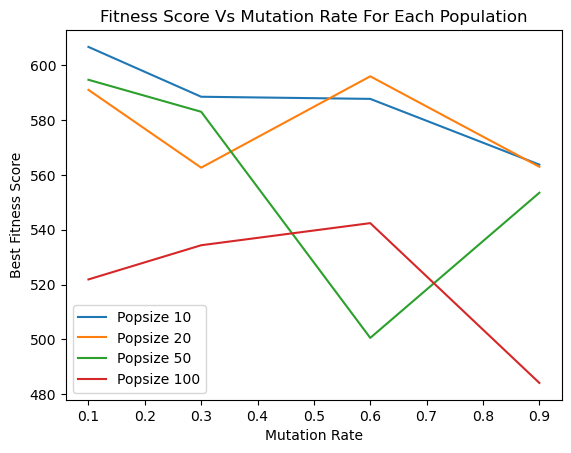

In [43]:
# Drawing Graphs

# Graph 1: Fitness score vs mutation rate for each population size

import matplotlib.pyplot as plt

# Data - Table 1 (Pop size,mutaion rate and best fitness score) in a dictionary
lines = {
    'Popsize 10': ([0.1,0.3,0.6,0.9], [606.68,588.51,587.73,563.76]),
    'Popsize 20': ([0.1,0.3,0.6,0.9], [591.02,562.65,595.96,562.97]),
    'Popsize 50': ([0.1,0.3,0.6,0.9], [594.70,583.03,500.57,553.50]),
    'Popsize 100': ([0.1,0.3,0.6,0.9], [521.89,534.36,542.42,484.15])
}
# Plotting the lines 
for label, (x, y) in lines.items():
   plt.plot(x, y, label = label)

plt.legend()
plt.xlabel('Mutation Rate')
plt.ylabel('Best Fitness Score')
plt.title('Fitness Score Vs Mutation Rate For Each Population')

plt.show()


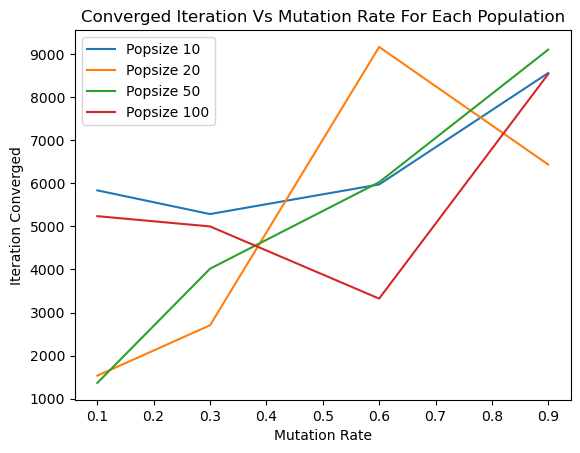

In [44]:
# Drawing Graphs

# Graph 2: Iteration converged vs mutation rate for each population size

import matplotlib.pyplot as plt

# Data - Table 1 (Pop size,mutaion rate and Converged Iteration) in a dictionary
lines = {
    'Popsize 10': ([0.1,0.3,0.6,0.9], [5837,5287,5974,8563]),
    'Popsize 20': ([0.1,0.3,0.6,0.9], [1534,2705,9168,6436]),
    'Popsize 50': ([0.1,0.3,0.6,0.9], [1366,4018,6027,9105]),
    'Popsize 100': ([0.1,0.3,0.6,0.9], [5238,5000,3324,8539])
}
# Plotting the lines 
for label, (x, y) in lines.items():
   plt.plot(x, y, label = label)

plt.legend()
plt.xlabel('Mutation Rate')
plt.ylabel('Iteration Converged')
plt.title('Converged Iteration Vs Mutation Rate For Each Population')

plt.show()
